In [1]:
%pylab inline
from skimage import data, color, exposure, io
import os
import urllib
# import urllib2

Populating the interactive namespace from numpy and matplotlib


# Obrazy

Powyżej zaimportowano kilka klas z biblioteki *scikit-image*:

  * data - przykładowe zdjęcia i metody do wczytywania danych
  * color - metody dotyczące przestrzeni barw
  * exposure - metody do obliczania i manipulacji histogramu
  * io - metody wyjścia/wejścia

Dokładny opis biblioteki znajdziesz tutaj: http://scikit-image.org/docs/stable/api/api.html

W bibliotece jest o wiele więcej klas, ale dzisiaj użyjemy tylko te wspomniane wyżej.

Oprócz *scikit-image* importujemy biblioteki *urllib* 1 i 2 do ściągania danych z internetu i standardowo *numpy* oraz *matplotlib*. Spójrzmy najpierw jakie metody mamy w klasie *data*?

In [2]:
dir(data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binary_blobs',
 '_os',
 'astronaut',
 'binary_blobs',
 'camera',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'data_dir',
 'expected_warnings',
 'horse',
 'hubble_deep_field',
 'img_as_bool',
 'immunohistochemistry',
 'imread',
 'load',
 'logo',
 'moon',
 'np',
 'page',
 'rocket',
 'stereo_motorcycle',
 'text',
 'use_plugin']

Wczytaj obraz o nazwie "astronaut" i wyświetl go metodą *pyplot.imshow*.

Sprawdź jakiego typu danych jest zmienna zawierająca obraz i jakiego kształtu jest ta macierz.

Narysuj osobno czerwoną, zieloną i niebieską składową obrazu.

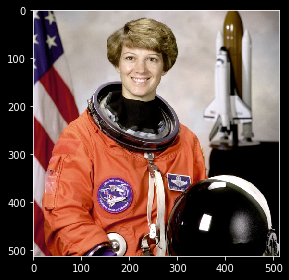

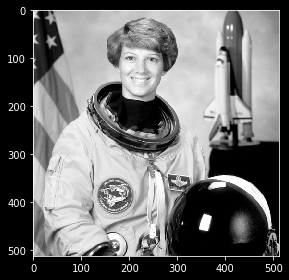

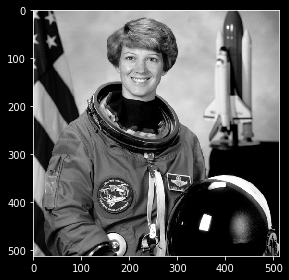

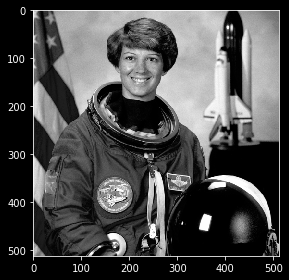

In [5]:
style.use("dark_background")
i = data.astronaut()
io.imshow(i)

figure()
io.imshow(i[:, :, 0])
figure()
io.imshow(i[:, :, 1])
figure()
io.imshow(i[:, :, 2])

## Wczytywanie z internetu

Wczytaj teraz obraz PNG z internetu i narysuj go.

Można użyć ten URL: http://www.pja.edu.pl/templates/pjwstk/images/logo-lg-md.png

Użyj metody *urllib2.urlopen* żeby otworzyć strumień i przekaż go do funkcji *pyplot.imread*.

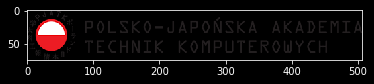

In [8]:
s = urllib.request.urlopen("http://www.pja.edu.pl/templates/pjwstk/images/logo-lg-md.png")
i = imread(s)
s.close()

imshow(i)

Swpróbujmy obraz https://upload.wikimedia.org/wikipedia/commons/a/a0/Sunflower_as_gif_websafe.gif

Pyplot niestety nie obsługuje obrazów GIF, więc w tym przypadku trzeba ściągnąć i zapisać plik na dysku. Do tego można użyć metody *urllib.urlretrieve*, a potem można obraz wczytać metodą *data.load* z biblioteki *scikit-image*.

Metoda *data.load* nie wczytuje plików z bieżącego katalogu, więc należy użyć metody *os.getcwd()* żeby wskazać katalog w którym się znajdujemy.

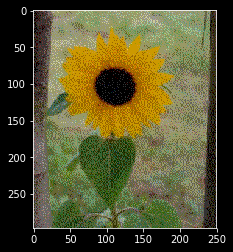

In [15]:
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/a/a0/Sunflower_as_gif_websafe.gif", "flower.gif")
i = data.load(os.getcwd() + "/flower.gif")

imshow(i)

## Przestrzenie barw

Zmień przetrzeń barw z RGB na HSV i narysuj składwe H, S i V obrazu.

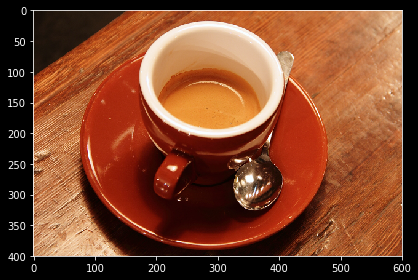

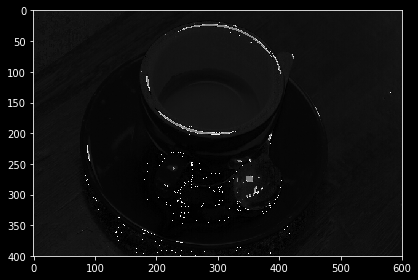

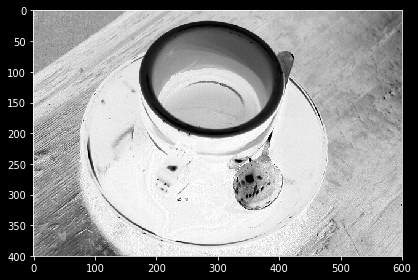

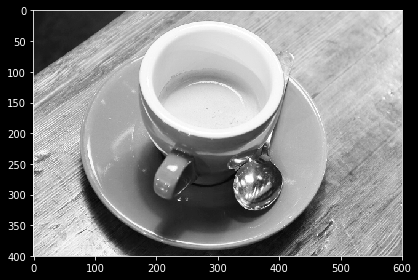

In [18]:
i = data.coffee()
io.imshow(i)

i = color.rgb2hsv(i)
figure()
io.imshow(i[:,:,0])
figure()
io.imshow(i[:,:,1])
figure()
io.imshow(i[:,:,2])

Zrób to samo ale dla przestrzeni LAB.

/usr/local/lib/python3.4/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


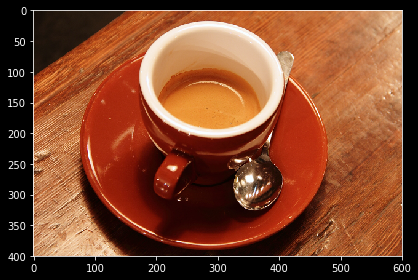

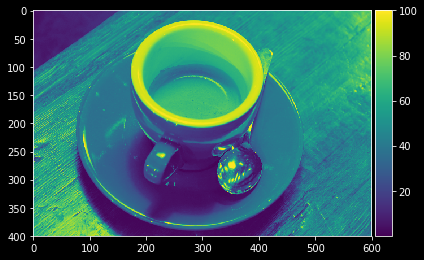

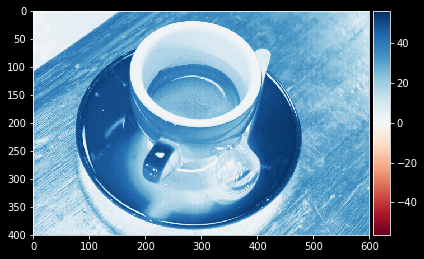

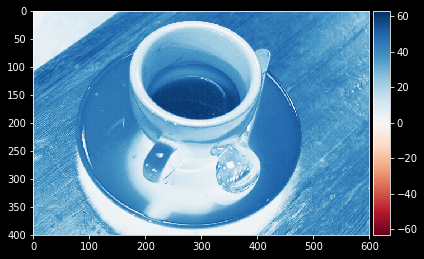

In [19]:
i = data.coffee()
io.imshow(i)

i = color.rgb2lab(i)
figure()
io.imshow(i[:,:,0])
figure()
io.imshow(i[:,:,1])
figure()
io.imshow(i[:,:,2])

Narysuj obraz astronautki w odcieniach szerości i zbliż zdjęcie do zakresu 250-350 w osi X i Y (użwając metod *xlim* i *ylim*).

Sprawdź działanie argumentu *interpolation* w metodzie *imshow* (sprawdź ustawienie 'none').

(350, 250)

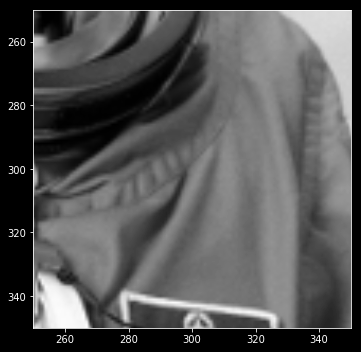

In [33]:
figure(figsize=(15,5))
subplot(121)
i = data.astronaut()
io.imshow(i)

i = color.rgb2grey(i)
subplot(122)
io.imshow(i, interpolation="bilinear")
xlim(250,350)
ylim(350,250)

## Histogramy

Policz histogram obrazu Lena w odcieniach szarości uzywając 3 metod:

  * biblioteką scikit-image - metoda *exposure.histogram*
  * biblioteką numpy - metoda *numpy.histogram*
  * biblioteką matplotlib - metoda *pyplot.hist*
  
Narsyuj przy użyciu wykresu *pyplot.bar* albo *pyplot.plot*.

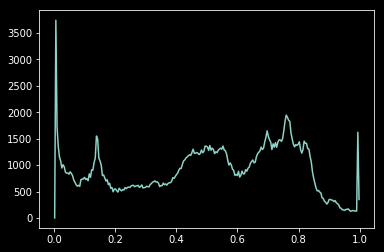

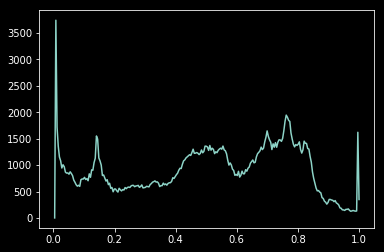

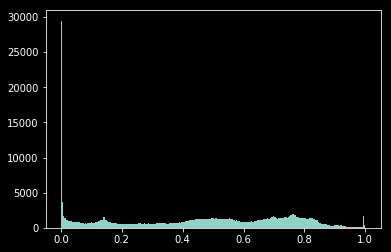

In [52]:
i = data.astronaut()
i = color.rgb2grey(i)
h,x=exposure.histogram(i)
h[0]=0
plot(x,h)
figure()
h,x=histogram(i, bins=256)
h[0]=0
plot(x[1:],h)
figure()
_=hist(i.flatten(), bins=256)

## Steganografia

Wczytaj obraz stego.bmp i wyświetl. Czy jest coś nie tak z tym obrazem?

Narysuj jego histogram.

Odczytaj 3 ostatnie bity każdego piksela z danego obrazu i zrób z tego inny obraz.

Metoda ukrywania informacji w obrazach (lub innych zbiorach danych gdzie niewielkie perturbacje wartości nie zmieniają jego treści) znana jest właśnie pod nazwą *steganografia*. Więcej informacji znajdziesz tutaj:

https://en.wikipedia.org/wiki/Steganography

/usr/local/lib/python3.4/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


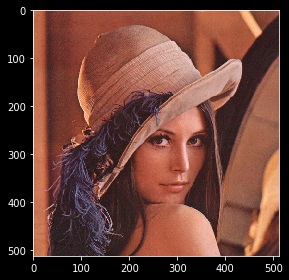

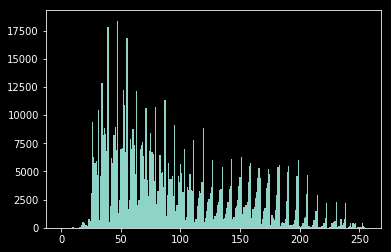

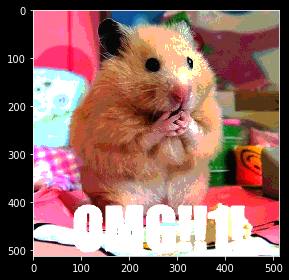

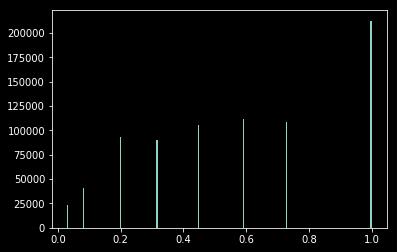

In [65]:
i = data.load(os.getcwd() + "/stego.bmp")
io.imshow(i)
figure()
_=hist(i.flatten(), bins=256)

mask = 7
i = bitwise_and(i, mask)
i=exposure.equalize_hist(i)
figure()
io.imshow(i)
figure()
_=hist(i.flatten(), bins=256)

# Praca domowa

Zrób własny przykład steganografii. Ukryj jakąś informacje (nie musi to być zdjęcie) w jakimś innym pliku tak żeby nie zaburzyć jego 